# 10 Minutes to Pandas

In [101]:
import numpy as np
import pandas as pd

# OBJECT CREATION

In [102]:
#1 Creating a Series by passing a list of values, letting pandas create a default integer index:

In [103]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [104]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [105]:
#2 Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

In [106]:
dates = pd.date_range("20130101", periods=6)

In [107]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [108]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))

In [109]:
df

,A,B,C,D
2013-01-01,-0.064175,-0.657839,0.938198,1.254779
2013-01-02,-0.164389,-1.819528,-0.176341,1.740370
2013-01-03,-2.177535,-0.790771,0.446020,-0.218580
2013-01-04,0.315478,-0.093763,0.789081,0.938993
2013-01-05,1.272952,2.279634,-0.394198,1.967184
2013-01-06,0.380580,-0.644115,-0.353663,-0.357816


In [110]:
#3 Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [111]:
df2 = pd.DataFrame(
   ...:     {
   ...:         "A": 1.0,
   ...:         "B": pd.Timestamp("20130102"),
   ...:         "C": pd.Series(1, index=list(range(4)), dtype="float32"),
   ...:         "D": np.array([3] * 4, dtype="int32"),
   ...:         "E": pd.Categorical(["test", "train", "test", "train"]),
   ...:         "F": "foo",
   ...:     }
   ...: )

In [112]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [113]:
# The columns of the resulting DataFrame have different dtypes

In [114]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# VIEWING DATA

In [115]:
# to view the top and bottom rows of the frame:

In [116]:
df.head()

,A,B,C,D
2013-01-01,-0.064175,-0.657839,0.938198,1.254779
2013-01-02,-0.164389,-1.819528,-0.176341,1.740370
2013-01-03,-2.177535,-0.790771,0.446020,-0.218580
2013-01-04,0.315478,-0.093763,0.789081,0.938993
2013-01-05,1.272952,2.279634,-0.394198,1.967184


In [117]:
df.tail(3)

,A,B,C,D
2013-01-04,0.315478,-0.093763,0.789081,0.938993
2013-01-05,1.272952,2.279634,-0.394198,1.967184
2013-01-06,0.380580,-0.644115,-0.353663,-0.357816


In [118]:
# Display the index, columns:

In [119]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [120]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [121]:
# DataFrame.to_numpy() gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your DataFrame has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to a Python object.

In [122]:
# For df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn’t require copying data.

In [123]:
df.to_numpy()

array([[-0.06417461, -0.65783876,  0.93819849,  1.25477919],
       [-0.16438852, -1.81952783, -0.17634128,  1.74036958],
       [-2.17753511, -0.79077069,  0.44602036, -0.21858032],
       [ 0.31547783, -0.09376275,  0.78908103,  0.93899328],
       [ 1.27295206,  2.27963448, -0.39419773,  1.96718369],
       [ 0.38058022, -0.64411531, -0.3536634 , -0.35781611]])

In [124]:
# For df2, the DataFrame with multiple dtypes, DataFrame.to_numpy() is relatively expensive.

In [125]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [126]:
#DataFrame.to_numpy() does not include the index or column labels in the output.

In [127]:
#describe() shows a quick statistic summary of your data:

In [128]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.072848,-0.287730,0.208183,0.887488
std,1.149412,1.377856,0.592170,0.980293
min,-2.177535,-1.819528,-0.394198,-0.357816
25%,-0.139335,-0.757538,-0.309333,0.070813
50%,0.125652,-0.650977,0.134840,1.096886
75%,0.364305,-0.231351,0.703316,1.618972
max,1.272952,2.279634,0.938198,1.967184


In [129]:
#Transposing your data:

In [130]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.064175,-0.164389,-2.177535,0.315478,1.272952,0.380580
B,-0.657839,-1.819528,-0.790771,-0.093763,2.279634,-0.644115
C,0.938198,-0.176341,0.446020,0.789081,-0.394198,-0.353663
D,1.254779,1.740370,-0.218580,0.938993,1.967184,-0.357816


In [131]:
#Sorting by an axis:

In [132]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.254779,0.938198,-0.657839,-0.064175
2013-01-02,1.740370,-0.176341,-1.819528,-0.164389
2013-01-03,-0.218580,0.446020,-0.790771,-2.177535
2013-01-04,0.938993,0.789081,-0.093763,0.315478
2013-01-05,1.967184,-0.394198,2.279634,1.272952
2013-01-06,-0.357816,-0.353663,-0.644115,0.380580


In [133]:
#Sorting by values:

In [134]:
df.sort_values(by="B")

,A,B,C,D
2013-01-02,-0.164389,-1.819528,-0.176341,1.740370
2013-01-03,-2.177535,-0.790771,0.446020,-0.218580
2013-01-01,-0.064175,-0.657839,0.938198,1.254779
2013-01-06,0.380580,-0.644115,-0.353663,-0.357816
2013-01-04,0.315478,-0.093763,0.789081,0.938993
2013-01-05,1.272952,2.279634,-0.394198,1.967184


# SELECTION

In [135]:
#While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc and .iloc.

##Getting

In [136]:
# Selecting a single column, which yields a Series, equivalent to df.A:

In [137]:
df["A"]

2013-01-01   -0.064175
2013-01-02   -0.164389
2013-01-03   -2.177535
2013-01-04    0.315478
2013-01-05    1.272952
2013-01-06    0.380580
Freq: D, Name: A, dtype: float64

In [138]:
#Selecting via [], which slices the rows.

In [139]:
df[0:3]

,A,B,C,D
2013-01-01,-0.064175,-0.657839,0.938198,1.254779
2013-01-02,-0.164389,-1.819528,-0.176341,1.740370
2013-01-03,-2.177535,-0.790771,0.446020,-0.218580


In [140]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-0.164389,-1.819528,-0.176341,1.740370
2013-01-03,-2.177535,-0.790771,0.446020,-0.218580
2013-01-04,0.315478,-0.093763,0.789081,0.938993


In [141]:
# Selection by label (ROW LABELS AND COLUMN LABELS)

In [142]:
# For getting a cross section using a label:

In [143]:
df.loc[dates[0]]

A   -0.064175
B   -0.657839
C    0.938198
D    1.254779
Name: 2013-01-01 00:00:00, dtype: float64

In [144]:
# Selecting on a multi-axis by label:

In [145]:
df.loc[:,["A","B"]]

,A,B
2013-01-01,-0.064175,-0.657839
2013-01-02,-0.164389,-1.819528
2013-01-03,-2.177535,-0.790771
2013-01-04,0.315478,-0.093763
2013-01-05,1.272952,2.279634
2013-01-06,0.380580,-0.644115


In [146]:
# Showing label slicing, both endpoints are included:

In [147]:
df.loc["20130102":"20130104", ["A","B"]]

,A,B
2013-01-02,-0.164389,-1.819528
2013-01-03,-2.177535,-0.790771
2013-01-04,0.315478,-0.093763


In [148]:
# Reduction in the dimension of the returned object:

In [149]:
df.loc["20130102",["A","B"]]

A   -0.164389
B   -1.819528
Name: 2013-01-02 00:00:00, dtype: float64

In [150]:
# For getting a scalar value:

In [151]:
df.loc[dates[0],"A"]

-0.06417460930383234

In [152]:
# For getting fast access to a scalar (equivalent to the prior method):

In [153]:
df.at[dates[0],"A"]

-0.06417460930383234

In [154]:
# SELECTION BY POSITION

In [155]:
# Select via the position of the passed integers:

In [156]:
df.iloc[3]

A    0.315478
B   -0.093763
C    0.789081
D    0.938993
Name: 2013-01-04 00:00:00, dtype: float64

In [157]:
# By integers slices, acting similar to numpy/Python:

In [158]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.315478,-0.093763
2013-01-05,1.272952,2.279634


In [159]:
 # By lists of integer position locations, similar to the NumPy/Python style:

In [160]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.164389,-0.176341
2013-01-03,-2.177535,0.446020
2013-01-05,1.272952,-0.394198


In [161]:
# For slicing rows explicitly:

In [162]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.164389,-1.819528,-0.176341,1.74037
2013-01-03,-2.177535,-0.790771,0.446020,-0.21858


In [163]:
# For slicing columns explicitly:

In [164]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.657839,0.938198
2013-01-02,-1.819528,-0.176341
2013-01-03,-0.790771,0.446020
2013-01-04,-0.093763,0.789081
2013-01-05,2.279634,-0.394198
2013-01-06,-0.644115,-0.353663


In [165]:
# For getting a value explicitly:

In [166]:
df.iloc[1, 1]

-1.8195278290529011

In [167]:
# For getting fast access to a scalar (equivalent to the prior method):

In [168]:
df.iat[1, 1]

-1.8195278290529011

In [169]:
# Boolean indexing

In [170]:
# Using a single column’s values to select data.

In [171]:
df[df["A"] > 0]

,A,B,C,D
2013-01-04,0.315478,-0.093763,0.789081,0.938993
2013-01-05,1.272952,2.279634,-0.394198,1.967184
2013-01-06,0.380580,-0.644115,-0.353663,-0.357816


In [172]:
# Selecting values from a DataFrame where a boolean condition is met.

In [173]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,0.938198,1.254779
2013-01-02,NaN,NaN,NaN,1.740370
2013-01-03,NaN,NaN,0.446020,NaN
2013-01-04,0.315478,NaN,0.789081,0.938993
2013-01-05,1.272952,2.279634,NaN,1.967184
2013-01-06,0.380580,NaN,NaN,NaN


In [174]:
# Using the isin() method for filtering:

In [175]:
df2 = df.copy()

In [176]:
df2["E"] = ["one", "one", "two", "three", "four", "three"]

In [177]:
df2

,A,B,C,D,E
2013-01-01,-0.064175,-0.657839,0.938198,1.254779,one
2013-01-02,-0.164389,-1.819528,-0.176341,1.740370,one
2013-01-03,-2.177535,-0.790771,0.446020,-0.218580,two
2013-01-04,0.315478,-0.093763,0.789081,0.938993,three
2013-01-05,1.272952,2.279634,-0.394198,1.967184,four
2013-01-06,0.380580,-0.644115,-0.353663,-0.357816,three


In [178]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-2.177535,-0.790771,0.446020,-0.218580,two
2013-01-05,1.272952,2.279634,-0.394198,1.967184,four


In [179]:
#Setting

In [180]:
s1 =pd.Series([1,2,3,4,5,6],index=pd.date_range("20130102",periods=6))

In [181]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [182]:
# Setting Values by Label

In [183]:
df.at[dates[0],"A"] =0

In [184]:
# Setting Values by Position

In [185]:
df.iat[0,1]=0

In [186]:
#Setting by assigning with NumPy array:

In [187]:
df.loc[:,"D"] =np.array([5] * len(df))

In [188]:
#The result of the prior setting operations.

In [189]:
df

,A,B,C,D
2013-01-01,0.000000,0.000000,0.938198,5
2013-01-02,-0.164389,-1.819528,-0.176341,5
2013-01-03,-2.177535,-0.790771,0.446020,5
2013-01-04,0.315478,-0.093763,0.789081,5
2013-01-05,1.272952,2.279634,-0.394198,5
2013-01-06,0.380580,-0.644115,-0.353663,5


In [190]:
# A where operation with setting.

In [191]:
df2 = df.copy()

In [192]:
df2 [df2 > 0] = -df2

In [193]:
df2

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.938198,-5
2013-01-02,-0.164389,-1.819528,-0.176341,-5
2013-01-03,-2.177535,-0.790771,-0.446020,-5
2013-01-04,-0.315478,-0.093763,-0.789081,-5
2013-01-05,-1.272952,-2.279634,-0.394198,-5
2013-01-06,-0.380580,-0.644115,-0.353663,-5


# MISSING DATA

In [194]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

In [195]:
df1.loc[dates[0] : dates[1], "E"] = 1

In [196]:
df1

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.938198,5,1.0
2013-01-02,-0.164389,-1.819528,-0.176341,5,1.0
2013-01-03,-2.177535,-0.790771,0.446020,5,NaN
2013-01-04,0.315478,-0.093763,0.789081,5,NaN


In [ ]:
# To drop any rows that have missing data.

In [197]:
df1.dropna(how="any")

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.938198,5,1.0
2013-01-02,-0.164389,-1.819528,-0.176341,5,1.0


In [ ]:
# Filling missing data.

In [198]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.938198,5,1.0
2013-01-02,-0.164389,-1.819528,-0.176341,5,1.0
2013-01-03,-2.177535,-0.790771,0.446020,5,5.0
2013-01-04,0.315478,-0.093763,0.789081,5,5.0


In [ ]:
# To get the boolean mask where values are nan.

In [199]:
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


df1

# OPERATIONS

In [208]:
##STATS

In [ ]:
# Operations in general exclude missing data.

In [ ]:
# Performing a descriptive statistic:

In [202]:
df.mean()

A   -0.062152
B   -0.178090
C    0.208183
D    5.000000
dtype: float64

In [ ]:
# Same operation on the other axis:

In [203]:
df.mean(1)

2013-01-01    1.484550
2013-01-02    0.709936
2013-01-03    0.619429
2013-01-04    1.502699
2013-01-05    2.039597
2013-01-06    1.095700
Freq: D, dtype: float64

In [ ]:
# Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [204]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)


In [205]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [206]:
df.sub(s, axis="index")

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-3.177535,-1.790771,-0.553980,4.0
2013-01-04,-2.684522,-3.093763,-2.210919,2.0
2013-01-05,-3.727048,-2.720366,-5.394198,0.0
2013-01-06,NaN,NaN,NaN,NaN


In [ ]:
##APPLY

In [ ]:
# Applying functions to the data:

In [209]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,0.000000,0.938198,5
2013-01-02,-0.164389,-1.819528,0.761857,10
2013-01-03,-2.341924,-2.610299,1.207878,15
2013-01-04,-2.026446,-2.704061,1.996959,20
2013-01-05,-0.753494,-0.424427,1.602761,25
2013-01-06,-0.372914,-1.068542,1.249097,30


In [210]:
df.apply(lambda x: x.max() - x.min())

A    3.450487
B    4.099162
C    1.332396
D    0.000000
dtype: float64

In [ ]:
# HISTOGRAMMING

In [211]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [212]:
s

0    6
1    1
2    6
3    6
4    4
5    5
6    1
7    6
8    0
9    0
dtype: int32

In [213]:
s.value_counts()

6    4
0    2
1    2
4    1
5    1
dtype: int64

In [ ]:
# STRING METHODS

In [214]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])

In [215]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# MERGE

In [ ]:
# Concat

In [217]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [218]:
df

,A,B,C,D
2013-01-01,0.000000,0.000000,0.938198,5
2013-01-02,-0.164389,-1.819528,-0.176341,5
2013-01-03,-2.177535,-0.790771,0.446020,5
2013-01-04,0.315478,-0.093763,0.789081,5
2013-01-05,1.272952,2.279634,-0.394198,5
2013-01-06,0.380580,-0.644115,-0.353663,5


In [ ]:
# break it into pieces

In [219]:
pieces = [df[:3], df[3:7], df[7:]]

In [220]:
pd.concat(pieces)

,A,B,C,D
2013-01-01,0.000000,0.000000,0.938198,5
2013-01-02,-0.164389,-1.819528,-0.176341,5
2013-01-03,-2.177535,-0.790771,0.446020,5
2013-01-04,0.315478,-0.093763,0.789081,5
2013-01-05,1.272952,2.279634,-0.394198,5
2013-01-06,0.380580,-0.644115,-0.353663,5


In [ ]:
# JOIN

In [ ]:
##SQL style merges.

In [221]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})

In [222]:
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [223]:
left

,key,lval
0,foo,1
1,foo,2


In [224]:
right

,key,rval
0,foo,4
1,foo,5


In [225]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


# GROUPING

In [227]:
df = pd.DataFrame(
   ....:     {
   ....:         "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
   ....:         "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
   ....:         "C": np.random.randn(8),
   ....:         "D": np.random.randn(8),
   ....:     }
   ....: )
   ....: 

In [228]:
df

,A,B,C,D
0,foo,one,0.335515,0.285829
1,bar,one,-1.391875,-0.566581
2,foo,two,1.336486,0.019504
3,bar,three,-0.370134,0.699281
4,foo,two,-0.298834,0.720191
5,bar,two,0.853195,-2.095716
6,foo,one,0.349938,-0.125268
7,foo,three,-0.286642,1.213328


In [ ]:
# Grouping and then applying the sum() function to the resulting groups.

In [229]:
df.groupby("A").sum()

,C,D
A,,
bar,-0.908814,-1.963016
foo,1.436462,2.113584


In [231]:
# Grouping by multiple columns forms a hierarchical index, and again we can apply the sum() function.

In [232]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -1.391875 -0.566581
    three -0.370134  0.699281
    two    0.853195 -2.095716
foo one    0.685453  0.160561
    three -0.286642  1.213328
    two    1.037651  0.739695

# RESHAPING

In [ ]:
#Stack

In [234]:
tuples = list(
   ....:     zip(
   ....:         *[
   ....:             ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
   ....:             ["one", "two", "one", "two", "one", "two", "one", "two"],
   ....:         ]
   ....:     )
   ....: )
   ....: 

In [235]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

In [236]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

In [237]:
df2 = df[:4]

In [238]:
df2

A         B
first second                    
bar   one    -0.409031 -0.310459
      two    -0.266863 -0.358598
baz   one     0.465487 -0.308959
      two    -0.759225  0.576883

In [ ]:
# The stack() method “compresses” a level in the DataFrame’s columns.

In [239]:
stacked = df2.stack()

In [240]:
stacked

first  second   
bar    one     A   -0.409031
               B   -0.310459
       two     A   -0.266863
               B   -0.358598
baz    one     A    0.465487
               B   -0.308959
       two     A   -0.759225
               B    0.576883
dtype: float64

In [ ]:
# With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:

In [241]:
stacked.unstack()

A         B
first second                    
bar   one    -0.409031 -0.310459
      two    -0.266863 -0.358598
baz   one     0.465487 -0.308959
      two    -0.759225  0.576883

In [242]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.409031 -0.266863
      B -0.310459 -0.358598
baz   A  0.465487 -0.759225
      B -0.308959  0.576883

In [243]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.409031  0.465487
       B -0.310459 -0.308959
two    A -0.266863 -0.759225
       B -0.358598  0.576883

In [ ]:
# Pivot tables

In [245]:
df = pd.DataFrame(
   .....:     {
   .....:         "A": ["one", "one", "two", "three"] * 3,
   .....:         "B": ["A", "B", "C"] * 4,
   .....:         "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
   .....:         "D": np.random.randn(12),
   .....:         "E": np.random.randn(12),
   .....:     }
   .....: )

In [246]:
df

,A,B,C,D,E
0,one,A,foo,-0.010567,-0.315743
1,one,B,foo,0.307932,-0.289379
2,two,C,foo,-0.372551,-1.474668
3,three,A,bar,0.865918,0.077411
4,one,B,bar,0.670167,-0.837815
5,one,C,bar,-1.245136,0.655502
6,two,A,foo,-0.952997,1.381299
7,three,B,foo,0.589149,-1.711793
8,one,C,foo,-1.754709,-0.718366
9,one,A,bar,-0.334328,0.094207


In [ ]:
#We can produce pivot tables from this data very easily:

In [247]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.334328 -0.010567
      B  0.670167  0.307932
      C -1.245136 -1.754709
three A  0.865918       NaN
      B       NaN  0.589149
      C  0.326544       NaN
two   A       NaN -0.952997
      B  0.778767       NaN
      C       NaN -0.372551

# Time series

In [ ]:
# pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the Time Series section.

In [249]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")

In [250]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [252]:
ts.resample("5Min").sum()

2012-01-01    24664
Freq: 5T, dtype: int32

In [ ]:
# Time zone representation:

In [253]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")

In [254]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [255]:
ts

2012-03-06   -0.382105
2012-03-07    0.517597
2012-03-08    0.823925
2012-03-09   -1.071450
2012-03-10   -0.044381
Freq: D, dtype: float64

In [256]:
ts_utc = ts.tz_localize("UTC")

In [257]:
ts_utc

2012-03-06 00:00:00+00:00   -0.382105
2012-03-07 00:00:00+00:00    0.517597
2012-03-08 00:00:00+00:00    0.823925
2012-03-09 00:00:00+00:00   -1.071450
2012-03-10 00:00:00+00:00   -0.044381
Freq: D, dtype: float64

In [ ]:
#Converting to another time zone:

In [258]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00   -0.382105
2012-03-06 19:00:00-05:00    0.517597
2012-03-07 19:00:00-05:00    0.823925
2012-03-08 19:00:00-05:00   -1.071450
2012-03-09 19:00:00-05:00   -0.044381
Freq: D, dtype: float64

In [ ]:
#Converting between time span representations:

In [259]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")

In [260]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [261]:
ts

2012-01-31    0.545314
2012-02-29    1.113215
2012-03-31    1.916384
2012-04-30   -0.523189
2012-05-31    1.398894
Freq: M, dtype: float64

In [262]:
ps = ts.to_period()

In [263]:
ps

2012-01    0.545314
2012-02    1.113215
2012-03    1.916384
2012-04   -0.523189
2012-05    1.398894
Freq: M, dtype: float64

In [264]:
ps.to_timestamp()

2012-01-01    0.545314
2012-02-01    1.113215
2012-03-01    1.916384
2012-04-01   -0.523189
2012-05-01    1.398894
Freq: MS, dtype: float64

In [266]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")

In [267]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [268]:
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9

In [269]:
ts.head()

1990-03-01 09:00   -0.102742
1990-06-01 09:00   -2.751546
1990-09-01 09:00    0.124313
1990-12-01 09:00    0.361362
1991-03-01 09:00   -1.519480
Freq: H, dtype: float64

# CATEGORICALS

In [ ]:
# pandas can include categorical data in a DataFrame. For full docs, see the categorical introduction and the API documentation.

In [270]:
df = pd.DataFrame(
   .....:     {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
   .....: )
   .....: 

In [ ]:
# Convert the raw grades to a categorical data type.

In [271]:
df["grade"] = df["raw_grade"].astype("category")

In [272]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [273]:
#  Rename the categories to more meaningful names (assigning to Series.cat.categories() is in place!).

In [274]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [ ]:
# Reorder the categories and simultaneously add the missing categories (methods under Series.cat() return a new Series by default).

In [275]:
df["grade"] = df["grade"].cat.set_categories(
   .....:     ["very bad", "bad", "medium", "good", "very good"]
   .....: )
   .....: 

In [276]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [ ]:
# Sorting is per order in the categories, not lexical order.

In [277]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [ ]:
#Grouping by a categorical column also shows empty categories.

In [278]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# PLOTTING

In [ ]:
#We use the standard convention for referencing the matplotlib API:

In [280]:
import matplotlib.pyplot as plt

In [281]:
 plt.close("all")

In [282]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

In [283]:
ts = ts.cumsum()

<AxesSubplot:>

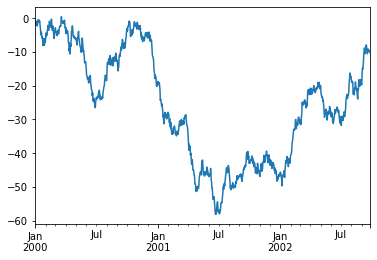

In [284]:
ts.plot()

In [ ]:
#On a DataFrame, the plot() method is a convenience to plot all of the columns with labels:

In [285]:
df = pd.DataFrame(
   .....:     np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
   .....: )
   .....: 

In [286]:
df = df.cumsum()

In [287]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

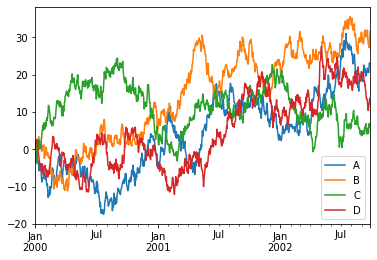

In [288]:
df.plot()

No handles with labels found to put in legend.


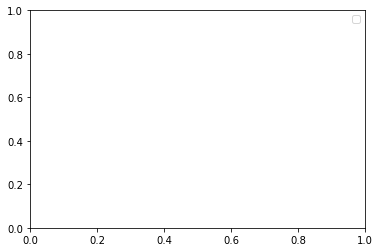

In [289]:
plt.legend(loc='best')

# Getting data in/out

In [ ]:
#CSV

In [ ]:
# Writing to a csv file.

In [290]:
df.to_csv("foo.csv")

In [ ]:
# Reading from a csv file.

In [291]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,-2.527008,-0.079340,1.174504,-0.053329
1,2000-01-02,-3.250804,1.502686,1.970903,1.580268
2,2000-01-03,-2.784522,1.371740,0.687167,2.020822
3,2000-01-04,-2.548094,0.759696,-0.718391,1.562830
4,2000-01-05,-0.617556,1.739722,-3.177620,2.619523
...,...,...,...,...,...
995,2002-09-22,20.507862,28.203631,6.011608,11.747308
996,2002-09-23,22.403715,27.157481,6.838014,12.160936
997,2002-09-24,23.093107,28.541863,6.426135,13.147304
998,2002-09-25,22.702658,30.532628,6.944976,13.732660


In [ ]:
# HDFS

In [ ]:
# Writing to a HDF5 Store.

In [292]:
df.to_hdf("foo.h5", "df")

In [ ]:
# Reading from a HDF5 Store.

In [293]:
pd.read_hdf("foo.h5", "df")

,A,B,C,D
2000-01-01,-2.527008,-0.079340,1.174504,-0.053329
2000-01-02,-3.250804,1.502686,1.970903,1.580268
2000-01-03,-2.784522,1.371740,0.687167,2.020822
2000-01-04,-2.548094,0.759696,-0.718391,1.562830
2000-01-05,-0.617556,1.739722,-3.177620,2.619523
...,...,...,...,...
2002-09-22,20.507862,28.203631,6.011608,11.747308
2002-09-23,22.403715,27.157481,6.838014,12.160936
2002-09-24,23.093107,28.541863,6.426135,13.147304
2002-09-25,22.702658,30.532628,6.944976,13.732660


In [ ]:
# EXCEL

In [ ]:
# Writing to an excel file.

In [294]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

In [295]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-2.527008,-0.079340,1.174504,-0.053329
1,2000-01-02,-3.250804,1.502686,1.970903,1.580268
2,2000-01-03,-2.784522,1.371740,0.687167,2.020822
3,2000-01-04,-2.548094,0.759696,-0.718391,1.562830
4,2000-01-05,-0.617556,1.739722,-3.177620,2.619523
...,...,...,...,...,...
995,2002-09-22,20.507862,28.203631,6.011608,11.747308
996,2002-09-23,22.403715,27.157481,6.838014,12.160936
997,2002-09-24,23.093107,28.541863,6.426135,13.147304
998,2002-09-25,22.702658,30.532628,6.944976,13.732660


# Gotchas

In [297]:
if pd.Series([False, True, False]):
...     print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().